**Part 1:** 

Use the **Fashion-MNIST** dataset for this question.

1) Load the dataset and perform splitting into training and validation sets with 70:30 ratio.

> Do we need to normalise data? [If so Does it make any difference?]

2) Implement the K Means algorithm. You need to find the optimal number of clusters using the
    elbow method and silhouette method. 

3) Define the initial clusters’ centroids using:</br>
> i) Forgy</br>

> ii) Random Partition

4) Experiment with different distance measures[Euclidean distance, Manhattan distance].

5) Plot the error vs number of clusters graph while using the elbow method and silhouette 
    method. Report the optimal number of clusters found.

6) Report the training and the validation accuracy and Compare your trained model with a model trained by the scikit-learn

7) Visualize the dataset to depict the clusters formed. #Prefer T-SNE

8) Implement K-means++, and repeat task 1 to task 7 again.</br>
</br>
</br>
</br>
</br>
**Part 2:**
</br>
In this task, you will perform operations on `[data.csv](https://drive.google.com/file/d/15NPkfXFoTkiRBlcI4ffe_Lp_BFOyf8UY/view?usp=sharing)`, data.csv is a  latent space representation of  Fashion-MNIST, before doing this task please read about latent space representation.

9) Load the data.csv file and apply Kmeans and Kmeans++, You need to find the optimal number of clusters using the elbow method and silhouette method.

10) Visualize the dataset to depict the clusters formed. # Prefer T-SNE

11) From these experiments(Part 1 and Part 2), compare accuracy or error, and report which one is better and why?
</br>
</br>
**Note:** If the model takes a lot of time to train you can use MiniBatchKMeans.
 




In [7]:
import numpy as np
import sys
from sklearn.model_selection import train_test_split

# // Both k means and k means++ are implemented here. as k means++ is just change 
# in the initiaization method  and if initialze_func k_means_plus_plus is passed it will use that function

#implement Kmeans from scratch
def euc_distance(x1, x2):
    return np.sum((x1 - x2)**2)**0.5
def mann_distance(x1, x2):
    return np.sum(np.abs(x1 - x2))
    
def foggy(X,no_of_samples,k):
    index_ids= np.random.choice(no_of_samples,size=k,replace=False)
    return X[index_ids,:]

def randomPartition(X,no_of_samples,k):
    indices = np.random.choice(range(0, k), size = no_of_samples,replace=True)
    centroids = []
    for count in range(k):
        centroids.append(X[indices == count].mean(axis=0))
    return centroids
#implement Kmeans from scratch
def k_means_plus_plus(X,no_of_samples,k):
    centroids = []
    initial_point=X[np.random.choice(no_of_samples, size = 1)]
    centroids.append(initial_point)
    for i in range(k-1):
        dis=[]
        for index,point in enumerate(X):
            temp = sys.maxsize 
            for centroid in centroids: 
                temp = min(temp,euc_distance(point, centroid)) 
            dis.append(temp)
        centroids.append(X[np.argmax(np.array(dis)), :])
    return centroids  
            



class KMeans():
    def __init__(self, K=10, max_iters=5,dis_function=euc_distance,initialze_func=randomPartition):
        self.K = K
        self.max_iters = max_iters
        self.dis_function=dis_function
        self.initialze_func=initialze_func

    def predict(self, X):
        no_of_samples, no_of_features = X.shape
        self.X=X
        centroids=self.initialze_func(X,no_of_samples,self.K)
        vc=0
        for _ in range(self.max_iters):
            # calculate new clusters
            clusters = [[] for __ in range(self.K)]
            for index,x in enumerate(X):
                dis=[]
                for y in centroids:
                    dis.append(self.dis_function(x, y))
                clusters[np.argmin(dis)].append(index)

            old_centroids=np.copy(centroids)
            # calculate new mean
            for index, sampleIds in enumerate(clusters):
                centroids[index] =np.mean(X[sampleIds], axis=0)
            if np.array_equal(centroids,old_centroids)== True:
                break
            
        self.clusters=clusters
        self.centroids=centroids
        self.no_of_samples=no_of_samples
        pred = np.empty(no_of_samples)
        for cluster_index, sample_ids in enumerate(clusters):
            for index in sample_ids:
                pred[index] = cluster_index   
        return pred
    def _inertia(self):
        temp=0
        for index,ids in enumerate(self.clusters):
            for id in ids:
              temp+=euc_distance(self.X[id],self.centroids[index])
        temp/=self.no_of_samples
        return temp

    def _centroids(self):
      return self.centroids

    def _clusters(self):
      return self.clusters

          


    

  

In [9]:
from keras.datasets import fashion_mnist
#  Splitted into 30 and 70 ratio
(trainX, trainy), (validationX, validationY) = fashion_mnist.load_data()
trainX = np.reshape(trainX, (trainX.shape[0], -1))
validationX = np.reshape(validationX, (validationX.shape[0], -1))
combined_x= np.concatenate((trainX, validationX), axis=0)
combined_y= np.concatenate((trainy, validationY), axis=0)
trainX,validationX,trainy,validationY = train_test_split(combined_x,combined_y,test_size=0.3, random_state=42)
trainX = trainX.astype('float64')
trainy = trainy.astype('float64')
validationX = validationX.astype('float64')
validationY = validationY.astype('float64')


In [ ]:
# def NormalizeData(data):
# from sklearn.cluster import KMeans
#     return (data - np.min(data)) / (np.max(data) - np.min(data))




Initializaion function-Foggy
---------------------------------


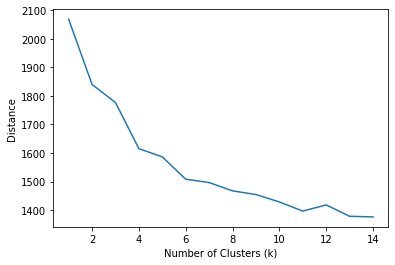

---------------------------------
Initializaion function-Kmeans+
---------------------------------


/usr/local/lib/python3.7/dist-packages/numpy/lib/function_base.py:792: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, order=order, subok=subok, copy=True)


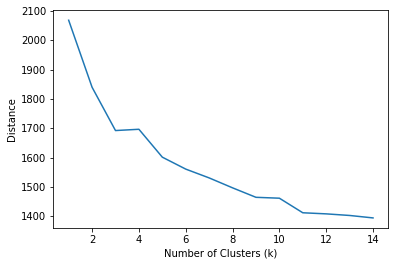

In [5]:
#implement elbow method from scratch


import matplotlib.pyplot as plt
import matplotlib.style as style
def elbow(init_func):
    clusters = np.arange(1,15)
    avg_distance=[]
    for i in clusters:
        kmeans = KMeans(K=i,initialze_func=init_func)
        kmeans.predict(trainX)
        avg_distance.append(kmeans._inertia())
    plt.plot(clusters, avg_distance)
    plt.xlabel("Number of Clusters (k)")
    plt.ylabel("Distance")
    plt.show()
print('Initializaion function-Foggy')
print('---------------------------------')
elbow(foggy)
print('---------------------------------')
print('Initializaion function-Kmeans+')
print('---------------------------------')
elbow(k_means_plus_plus)

# / Validation set is used.  it can be observed that elbow shape appears in 8 or 9 , event till 11 , 
# after that there is no not mich descrease in error

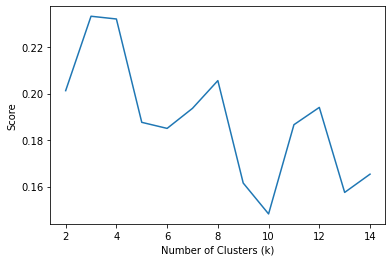

In [13]:


import matplotlib.pyplot as plt
import matplotlib.style as style
def silhouette(X):
    size_cluster =np.arange(2,15)
    avg_score=[]
    for size_c in size_cluster:
        nearest_dis=[]
        kmeans = KMeans(K=size_c)
        kmeans.predict(X)
        centroids= kmeans._centroids()
        nearest_dis=[]
        for i,item in enumerate(centroids):
            dis= float('inf')
            pos=100
            for j,item1 in enumerate(centroids):
              if i!=j:
                temp= euc_distance(item,item1)
                if temp<dis:
                  dis=temp
                  pos=j
            nearest_dis.append((pos,dis))

        clusters = kmeans._clusters()
        
        def compute_distances_no_loops(X,Y):
            dists = np.zeros((len(X), len(Y)))  
            dists = -2 * np.dot(X,Y.T) 
            x2=np.sum(X**2,axis=1)[:, np.newaxis]
            y2=np.sum(Y**2,axis=1)
            dists=np.sqrt(dists+x2+y2)
            avg=np.mean(dists,axis=1)
            sum=np.sum(avg,axis=0)
            return sum



        total =0
        sum_a=0
        sum_b=0
        
        for index,ids in enumerate(clusters):
          all_points_in_cluster=X[ids]
          all_points_in_cluster_copy=np.copy(all_points_in_cluster)
          sum_a+=compute_distances_no_loops(all_points_in_cluster,all_points_in_cluster_copy)
          nearest_cluster_index = nearest_dis[index][0]
          all_points_in_Other_cluster=X[clusters[nearest_cluster_index]]
          sum_b+=compute_distances_no_loops(all_points_in_cluster,all_points_in_Other_cluster)
          total+=len(ids)

        a=sum_a/total
        b=sum_b/total
        score= (b-a)/max(a,b)
        avg_score.append(score)
    plt.plot(size_cluster, avg_score)
    plt.xlabel("Number of Clusters (k)")
    plt.ylabel("Score")
    plt.show()
    
      



silhouette(validationX)




In [24]:
from sklearn.metrics.cluster import homogeneity_score

kmeans = KMeans(K=10,dis_function=euc_distance,initialze_func=foggy)
pred_foggy_eucledian= kmeans.predict(trainX)
kmeans = KMeans(K=10,dis_function=mann_distance,initialze_func=randomPartition)
pred_foggy_manhattan= kmeans.predict(trainX)
kmeans = KMeans(K=10,dis_function=euc_distance,initialze_func=foggy)
pred_random_eucledian= kmeans.predict(trainX)
kmeans = KMeans(K=10,dis_function=mann_distance,initialze_func=randomPartition)
pred_random_manhattan= kmeans.predict(trainX)
kmeans = KMeans(K=10,dis_function=euc_distance,initialze_func=k_means_plus_plus)
pred_kmeans_plus_eucledian= kmeans.predict(trainX)
kmeans = KMeans(K=10,dis_function=mann_distance,initialze_func=k_means_plus_plus)
pred_kmeans_plus_manhattan= kmeans.predict(trainX)

score_foggy_euc = homogeneity_score(pred_foggy_eucledian, trainy)
score_foggy_man = homogeneity_score(pred_foggy_manhattan, trainy)
score_random_euc = homogeneity_score(pred_random_eucledian, trainy)
score_random_man = homogeneity_score(pred_random_manhattan, trainy)
score_kmeans_plus_euc = homogeneity_score(pred_kmeans_plus_eucledian, trainy)
score_kmeans_plus_man = homogeneity_score(pred_kmeans_plus_manhattan, trainy)



from tabulate import tabulate

print(tabulate([['Foggy', score_foggy_euc,score_foggy_man], ['Random Partion', score_random_euc,score_random_man],['K means plus plus', score_kmeans_plus_euc,score_kmeans_plus_man]], headers=['Initialization/Distance_metric', 'Eucledian','Manhattan']))



/usr/local/lib/python3.7/dist-packages/numpy/lib/function_base.py:792: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, order=order, subok=subok, copy=True)


Initialization/Distance_metric      Eucledian    Manhattan
--------------------------------  -----------  -----------
Foggy                                0.495935     0.529579
Random Partion                       0.541872     0.541574
K means plus plus                    0.523439     0.517683


In [25]:
from sklearn.cluster import KMeans as KMeans_Sklearn
kmeans = KMeans_Sklearn(n_clusters=10,init='k-means++').fit(trainX)
score_sk_learn_kmeans_plus = homogeneity_score(kmeans.labels_, trainy)
kmeans = KMeans_Sklearn(n_clusters=10,init='random').fit(trainX)
score_sk_learn_random = homogeneity_score(kmeans.labels_, trainy)

print(tabulate([['Self made function', score_random_euc,score_kmeans_plus_euc], ['Sk learn library', score_sk_learn_random,score_sk_learn_kmeans_plus]], headers=['Library used/Init Function', 'Random','K means++']))


Library used/Init Function      Random    K means++
----------------------------  --------  -----------
Self made function            0.541872     0.523439
Sk learn library              0.523402     0.523377




```
# This is formatted as code
```

# Part2

In [36]:
!pip install gdown
!gdown --id 15NPkfXFoTkiRBlcI4ffe_Lp_BFOyf8UY



Downloading...
From: https://drive.google.com/uc?id=15NPkfXFoTkiRBlcI4ffe_Lp_BFOyf8UY
To: /content/data.csv
191MB [00:02, 89.6MB/s]


In [50]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder# instantiate labelencoder object
le = LabelEncoder()
df = pd.read_csv('data.csv', na_values='?',names=np.arange(193))
df.iloc[:, 0] = df.iloc[:, 0].apply(lambda x: x.strip('['))
df.iloc[:, 191] = df.iloc[:, 191].apply(lambda x: x.strip(' ]'))
df.iloc[:, 191] = pd.to_numeric(df.iloc[:, 191])
df.iloc[:, 0] = pd.to_numeric(df.iloc[:, 0])
df.iloc[:, 192] = df.iloc[:, 192].astype('category')
df.iloc[:, 192] = df.iloc[:, 192].cat.codes
y=df.iloc[:,-1]
df_mod = df.iloc[:, :-1]
x=df_mod.to_numpy()
y=y.to_numpy()
trainX, validateX, trainy, validatey = train_test_split(x, y, test_size=0.3)



Initializaion function-Foggy
---------------------------------


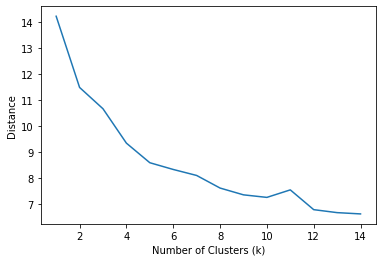

In [38]:

import matplotlib.pyplot as plt
import matplotlib.style as style
def elbow(init_func):
    clusters = np.arange(1,15)
    avg_distance=[]
    for i in clusters:
        kmeans = KMeans(K=i,initialze_func=init_func)
        kmeans.predict(validateX)
        avg_distance.append(kmeans._inertia())
    plt.plot(clusters, avg_distance)
    plt.xlabel("Number of Clusters (k)")
    plt.ylabel("Distance")
    plt.show()
print('Initializaion function-Foggy')
print('---------------------------------')
elbow(foggy)
# elbow can be taken from 10 to 12

In [41]:
from sklearn.metrics.cluster import homogeneity_score
kmeans = KMeans(K=10,dis_function=euc_distance,initialze_func=foggy)
pred_foggy_eucledian= kmeans.predict(trainX)
kmeans = KMeans(K=10,dis_function=euc_distance,initialze_func=k_means_plus_plus)
pred_kmeans_plus_eucledian= kmeans.predict(trainX)


score_kmeans = homogeneity_score(pred_foggy_eucledian, trainy)
score_kmeans_plus = homogeneity_score(pred_kmeans_plus_eucledian, trainy)

# K means score
print(score_kmeans)
# K means ++ score
print(score_kmeans_plus)

/usr/local/lib/python3.7/dist-packages/numpy/lib/function_base.py:792: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, order=order, subok=subok, copy=True)


0.4565046296353263
0.4849701299741733


In [ ]:
Comparison b/w earlier and latent space
score 1st part 0.523439
score 2st part 0.4849701299741733


In [42]:
import numpy as np
from sklearn.manifold import TSNE

X_embedded = TSNE(n_components=2).fit_transform(trainX)

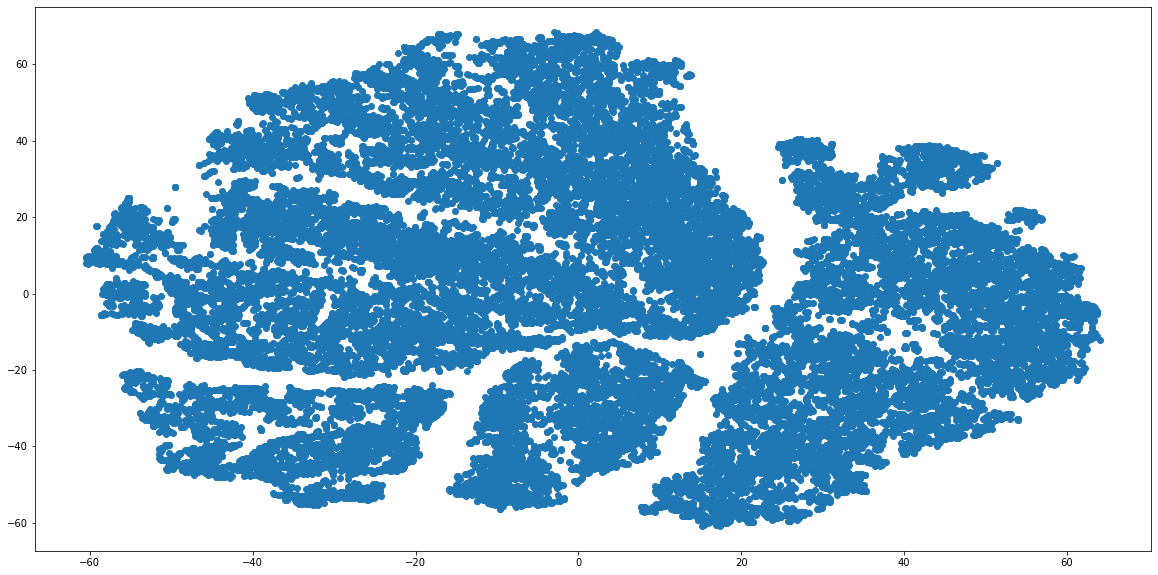

In [49]:
plt.figure(figsize=(20,10)) 
plt.scatter(X_embedded[:,0],X_embedded[:,1])
# // tsne plot